# Test the data loader creation code in $\texttt{pipeline.py}$.

In [1]:
import os
import numpy as np
import torch
import cv2
from torch.utils.data import DataLoader
import sys
import matplotlib.pyplot as plt

# Get the path of the project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))

# Add the project root to sys.path if it is not already in sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# Import the ImageSequenceDataset and create_dataloader from the pipeline module
from seismogram_extraction.pipeline import ImageSequenceDataset, create_dataloader

In [4]:
def test_dataloader(image_folder, gt_folder, batch_size=4):
    # Create dataloader
    dataloader = create_dataloader(image_folder, gt_folder, batch_size=batch_size)

    # Iterate through the dataloader
    for batch_idx, (images, ground_truths) in enumerate(dataloader):
        print(f"Batch {batch_idx + 1}:")
        
        # Check the image tensor shape (should be [batch_size, 1, height, width])
        print(f"Images shape: {images.shape}")
        print(images.max(), images.min())
        
        # Check the ground truth tensor shape (depends on the shape of the .npy files)
        print(f"Ground truths shape: {ground_truths.shape}")
        
        # Visualize the first image and its ground truth
        if batch_idx == 0:  # Only visualize for the first batch
            image = images[0].squeeze().cpu().numpy()  # Convert to numpy and remove channel dimension
            gt_s = ground_truths[0].cpu().numpy()  # Assuming ground truth is 2D
            
            # Display the image
            plt.imshow(image, cmap='gray')
            for i, gt in enumerate(gt_s):
                plt.scatter(np.arange(0, len(gt)), gt, s=0.1)
            plt.show()
        print()

Batch 1:
Images shape: torch.Size([4, 1, 400, 800])
tensor(1.) tensor(0.)
Ground truths shape: torch.Size([4, 5, 800])


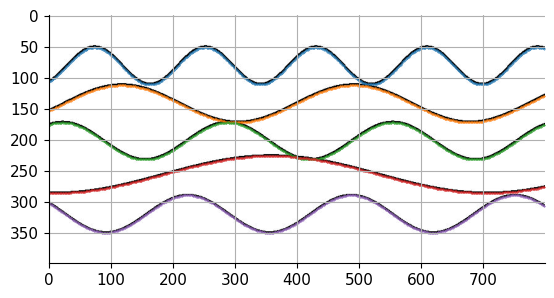


Batch 2:
Images shape: torch.Size([4, 1, 400, 800])
tensor(1.) tensor(0.)
Ground truths shape: torch.Size([4, 5, 800])

Batch 3:
Images shape: torch.Size([2, 1, 400, 800])
tensor(1.) tensor(0.)
Ground truths shape: torch.Size([2, 5, 800])



In [5]:
# Specify the paths to the image and ground truth folders
image_folder = r'D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data\sines\overlap_0-0\signals'
gt_folder = r'D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data\sines\overlap_0-0\ground_truth'

# Run the test
test_dataloader(image_folder, gt_folder, batch_size=4)

In [ ]:
# Specify the paths to the image and ground truth folders
image_folder = r'D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data\resampled\BE_UCC__HHE_2024-01-01T00-06-00_2024-01-14T00-12-00_1000_1_0-1\overlap_0-0\signals'
gt_folder = r'D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data\resampled\BE_UCC__HHE_2024-01-01T00-06-00_2024-01-14T00-12-00_1000_1_0-1\overlap_0-0\ground_truth'

# Run the test
test_dataloader(image_folder, gt_folder, batch_size=4)